# WAVE SIMULATION

## Wave Theory:
Wave as we know is nothing but a disturbance which transfers energy from one point to another. Here we are going to talk about the wave that is created due to the disturbance caused in a string which is kept fixed on both ends.

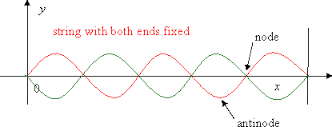

In [1]:
from IPython.display import display
from IPython.display import Image
display(Image(filename='images.png', width=500, height=500))

In this notebook, we are going to study the wave equation by simulating one-dimensional waves on a string like in a guitar or violin or a base or anything that has two fixed ends and also two-dimensional waves under fixed ends.
Lets us get started by defining the problem for 1D wave first.

## 1D WAVE

We will consider a string of length 10m having fixed zero displacement at both ends. The string is then plucked initially to give a shape $sinx$, which is the initial displacement, and has 0 velocity.

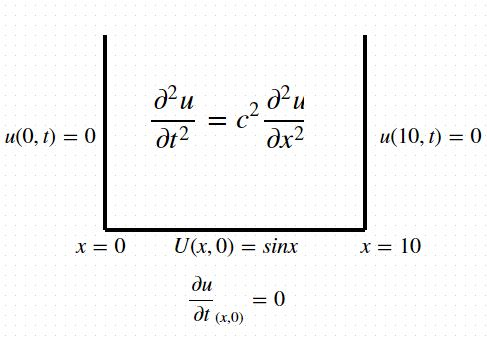

In [2]:
display(Image(filename='problem1D.JPG'))

So,  writing down the problem mathematically ,

Initial Conditions:  $$\frac{\partial U}{\partial t}_{\left ( x,0 \right )} = 0$$
                                
$$U(x,0)=sin x$$


Boundary Conditions:
$$U(0,t) = 0$$
                                 
$$U(10,t) = 0$$

The Partial Differential Equation for wave is given by:

$$\frac{\partial^2 U}{\partial t^2} = c^{2}\frac{\partial^2 U}{\partial x^2}\quad(1)$$

Now let us start Discretizing the partial differential equation with respect to space and time. The discretization is by taking a refernce of our [notebook on Space and Time](http://nbviewer.ipython.org/github/numerical-mooc/numerical-mooc/tree/master/lessons/02_spacetime/).

So, the 1D Wave equation with central difference in space and time both is given as:

$$\frac{U_{i}^{n+1}-2U_{i}^{n}+U_{i}^{n-1}}{\Delta t^{2}} =c^{2} \frac{U_{i}^{n+1}-2U_{i}^{n}+U_{i}^{n-1}}{\Delta x^{2}} \quad(2)$$                

If we assume  $U_{_{i}^{}}^{n}$ and $U_{_{i}^{}}^{n-1}$ are already computed then the only unknown parameter is $U_{_{i}^{}}^{n+1}$

So solving the descritized 1D wave equation to find out the unknown parameter:

$$U_{i}^{n+1}=-U_{i}^{n-1}+2U_{i}^{n}+c^{2}\frac{\Delta t^{2}}{\Delta x^{2}}\left ( U_{i+1}^{n}-2U_{i}^{n}+U_{i-1}^{n} \right )$$

$$U_{i}^{n+1}=-U_{i}^{n-1}+2U_{i}^{n}+C^{2}\left ( U_{i+1}^{n}-2U_{i}^{n}+U_{i-1}^{n} \right )\quad(3)$$

Where $$C^{2}=c^{2}\frac{\Delta t^{2}}{\Delta{}x ^{2}}$$

The graphical representation of the above descritized equation looks something like this, where, the 'n' terms represent the advancement in time and the 'i' terms represent advancement in space.  

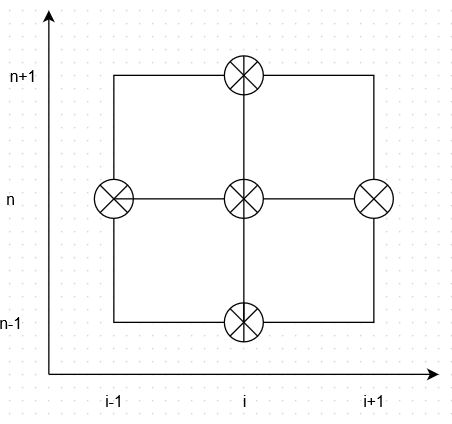

In [11]:
display(Image(filename='grid.JPG'))

One intresting thing happens here when 'n' is equal to 0, which is like the first iteration. When n=0, we get a term $U^{-1}$ which is outside our meshgrid as it does not fall under our time domain.

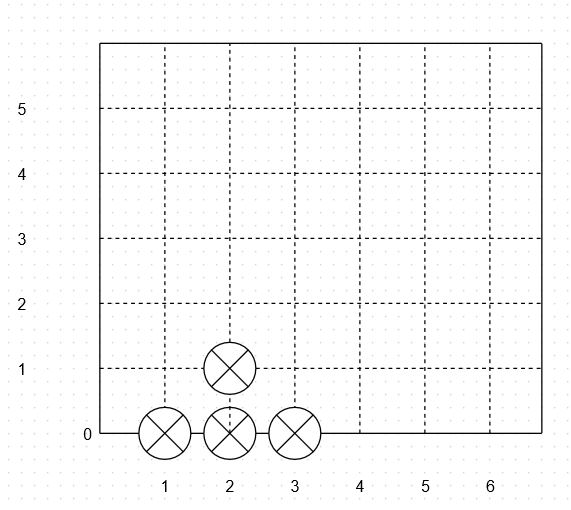

In [12]:
display(Image(filename='specialgrid.JPG'))

To take care of this problem we use the initial condition and get a special formula to find out the unknow parameter $U_{i}^{n+1}$.

For that will have to first descritize the derivative in the initial condition by the finite difference method of central difference type.

$$\frac{\partial U}{\partial t} = \frac{U_{_{i}^{}}^{n+1}-U_{_{i}^{}}^{n-1}}{2\Delta t}=0$$

$$U_{_{i}^{}}^{n+1}-U_{_{i}^{}}^{n-1}=0$$

$$U_{_{i}^{}}^{n+1}=U_{_{i}^{}}^{n-1}$$


The other initial condition is given by : $$U_{i} = sin (x_{i})$$

Now putting the above relation in equation (3) and solving it, we get:

$$U_{i}^{n+1}=U_{i}^{n}+\frac{C^{2}}{2}\left ( U_{i+1}^{n}-2U_{i}^{n}+U_{i-1}^{n} \right )\quad(4)$$

This equation will be used for the 1st iteration, when n=0.

For the rest of the iterations we will use the equation (3).

$$U_{i}^{n+1}=-U_{i}^{n-1}+2U_{i}^{n}+C^{2}\left ( U_{i+1}^{n}-2U_{i}^{n}+U_{i-1}^{n} \right)$$

Now let us start coding....

First we will import the necessary packages of python for our code.

In [14]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from JSAnimation.IPython_display import display_animation
from matplotlib import animation

Now let us insert all the data that we have for our problem.

In [15]:
L = 10.
nt = 100
nx = 100
c= 3

dx = L/(nx-1)
dt = dx/6
C2 = ((c**2) * ((dt/dx)**2))
Ui = numpy.zeros(nx)
Un = Ui.copy()
Unx = Un.copy()
x= numpy.linspace(0,L,nx)

Now let us set the initial condition....
                                
$$U_{i} = sin (x_{i})$$

In [16]:
def initial_condition(Ui, x,):
    for i in range(0,nx):
        Ui[i] = numpy.sin(x[i])
    return Ui

Next will be solving the descritized function...
$$U_{i}^{n+1}=-U_{i}^{n-1}+2U_{i}^{n}+C^{2}\left ( U_{i+1}^{n}-2U_{i}^{n}+U_{i-1}^{n} \right )$$

In [19]:
def ftcs(U, nt, dt, dx, C2, Un, Unx):
       
   
    for n in range(nt):   
        U[1:-1] = - Unx[1:-1] + 2*Un[1:-1] +\
                    (C2) *(Un[2:] -2*Un[1:-1] + Un[0:-2])
    
    #Applying Boundary Conditions
    U[0] = 0
    U[nt-1] = 0
    return U

But we need to implement that special condition that we talked above for the 1st iteration....
$$U_{i}^{n+1}=U_{i}^{n}+\frac{C^{2}}{2}\left ( U_{i+1}^{n}-2U_{i}^{n}+U_{i-1}^{n} \right )$$

In [20]:
def special_condition(C2, U, Un):
    for n in range (nt):
        U[1:-1] = Un[1:-1] + (1/2) * C2 * (Un[2:] - 2*Un[1:-1]+ Un[0:-2])
   
    #Applying Boundary Conditions
    U[0] = 0
    U[nt-1] = 0    
    return U

In [23]:
#calling the initial condition
y = initial_condition(Ui,x) 

In [24]:
#calling the condition used for 1st iteration
z = special_condition(C2, y, y.copy())  

In [25]:
#calling the main function
answer = ftcs(z, nt, dt, dx, C2, z.copy(), z.copy())

In [26]:
#printing the array
answer 

array([ 0.        ,  0.10058142,  0.20013748,  0.29765327,  0.39213467,
        0.4826185 ,  0.56818234,  0.64795392,  0.72112002,  0.78693476,
        0.8447272 ,  0.89390817,  0.93397632,  0.96452317,  0.98523731,
        0.99590758,  0.9964252 ,  0.9867849 ,  0.96708495,  0.93752617,
        0.89840992,  0.85013493,  0.79319337,  0.72816569,  0.65571483,
        0.57657936,  0.49156604,  0.40154151,  0.30742352,  0.21017154,
        0.11077699,  0.01025314, -0.09037523, -0.19008228, -0.28785157,
       -0.38268639, -0.47361996, -0.55972528, -0.64012455, -0.71399816,
       -0.78059301, -0.8392302 , -0.88931197, -0.93032777, -0.96185947,
       -0.98358561, -0.99528472, -0.99683753, -0.98822822, -0.96954454,
       -0.94097696, -0.90281673, -0.85545284, -0.79936815, -0.73513441,
       -0.66340644, -0.58491546, -0.50046164, -0.41090592, -0.31716128,
       -0.22018338, -0.12096085, -0.0205052 ,  0.08015948,  0.180007  ,
        0.27801945,  0.37319767,  0.46457138,  0.55120907,  0.63

setting up an array for time.....

In [27]:
time = numpy.linspace(0, nt, nx)


In [28]:
#printing time array
time

array([   0.        ,    1.01010101,    2.02020202,    3.03030303,
          4.04040404,    5.05050505,    6.06060606,    7.07070707,
          8.08080808,    9.09090909,   10.1010101 ,   11.11111111,
         12.12121212,   13.13131313,   14.14141414,   15.15151515,
         16.16161616,   17.17171717,   18.18181818,   19.19191919,
         20.2020202 ,   21.21212121,   22.22222222,   23.23232323,
         24.24242424,   25.25252525,   26.26262626,   27.27272727,
         28.28282828,   29.29292929,   30.3030303 ,   31.31313131,
         32.32323232,   33.33333333,   34.34343434,   35.35353535,
         36.36363636,   37.37373737,   38.38383838,   39.39393939,
         40.4040404 ,   41.41414141,   42.42424242,   43.43434343,
         44.44444444,   45.45454545,   46.46464646,   47.47474747,
         48.48484848,   49.49494949,   50.50505051,   51.51515152,
         52.52525253,   53.53535354,   54.54545455,   55.55555556,
         56.56565657,   57.57575758,   58.58585859,   59.59595

Let us plot the graph to see how well the wave formed looks...

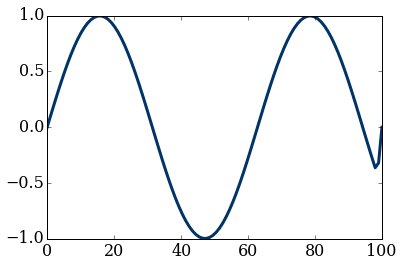

In [29]:
pyplot.plot(time, answer, color='#003366', lw=3)

Thats the wave we were expecting!!!!!

We intentionally took sin x as the initial displacement because we all know how a sine function travels through time and we can easily make out whether or not our simulation is coorect or not as it clearly ressembles the sine function.

## REFERENCES

1.   Barba, Lorena A., et al. "MEA 6286 Practical Numerical Methods with Python,"  Jupyter nbviewer notebooks, The George Washington University, 2015.
http://nbviewer.ipython.org/github/numerical-mooc/numerical-mooc/tree/master/lessons/

2.   Haberman, Richard. Elementary Applied Partial Differential Equations.

3.   Sarkar, Kaushik. "APSC 6213 Analytical Methdods in Engineering III," class notes.